In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder

from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, ConfusionMatrixDisplay

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler, LabelBinarizer

import tensorflow as tf
import keras as ks

#Import two datasets
train_df = pd.read_csv("sign_mnist_train.csv")
test_df = pd.read_csv("sign_mnist_test.csv")
print(train_df.shape)
print(test_df.shape)

#Making the two datasets into one so we can split it up how we want ^_^
full_df = pd.concat([train_df, test_df], ignore_index=True)
print(full_df.shape)

(27455, 785)
(7172, 785)
(34627, 785)


In [15]:
#Split the data into x and y variables
#X = full_df.drop(columns="label")
#y = full_df["label"]

X_train = train_df.drop(columns="label")
y_train = train_df["label"]

X_test = test_df.drop(columns="label")
y_test = test_df["label"]

In [23]:
#Printing out how a row of data looks

full_df.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,3,107,118,127,134,139,143,146,150,153,...,207,207,207,207,206,206,206,204,203,202
1,6,155,157,156,156,156,157,156,158,158,...,69,149,128,87,94,163,175,103,135,149
2,2,187,188,188,187,187,186,187,188,187,...,202,201,200,199,198,199,198,195,194,195
3,2,211,211,212,212,211,210,211,210,210,...,235,234,233,231,230,226,225,222,229,163
4,13,164,167,170,172,176,179,180,184,185,...,92,105,105,108,133,163,157,163,164,179


In [24]:
#Showing the amount of labels that exist (hand signals)
full_df.value_counts(["label"]).sort_index()

label
0        1457
1        1442
2        1454
3        1441
4        1455
5        1451
6        1438
7        1449
8        1450
10       1445
11       1450
12       1449
13       1442
14       1442
15       1435
16       1443
17       1438
18       1445
19       1434
20       1427
21       1428
22       1431
23       1431
24       1450
Name: count, dtype: int64

Text(0.5, 1.0, 'Hand label distribution in full dataset')

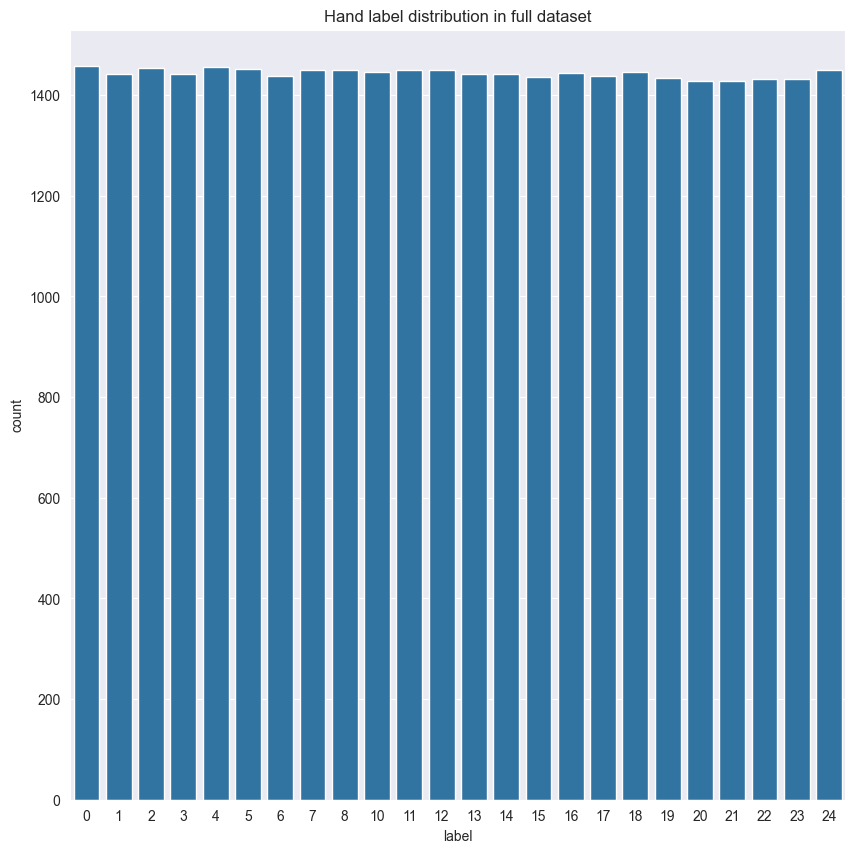

In [25]:
#Showing the distribution over hand labels

plt.figure(figsize= (10, 10))
sns.set_style('darkgrid')
sns.countplot(x='label', data=full_df)
plt.title("Hand label distribution in full dataset")

In [26]:
#Looking on each rows to see after label index if the entire row are 0 in pixels
pixel_columns = full_df.columns[1:]

all_zero_rows = full_df[pixel_columns].eq(0).all(axis=1)

print("Number of rows where all pixels are 0:", all_zero_rows.sum())

Number of rows where all pixels are 0: 0


In [27]:
log_reg = LogisticRegression(max_iter=5000, random_state=42)
rfg = RandomForestClassifier(n_estimators=200, random_state=42)
svc = SVC(random_state=42)

scaler = StandardScaler()
le = LabelEncoder()
lb = LabelBinarizer()

scikitmodels = [('Logistic Regression', log_reg),
                ('Random Forest', rfg),
                ('Support Vector Classifier', svc)]



In [33]:
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.3, random_state=42, stratify=y_train)

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

y_train_enc = le.fit_transform(y_train)
y_test_enc = le.transform(y_test)

In [ ]:
for name, model in scikitmodels:
    model.fit(X_train_scaled, y_train_enc)
    y_pred = model.predict(X_test_scaled)
    print(f"Model: {name}")
    print("Accuracy:", accuracy_score(y_test_enc, y_pred))

    

Model: Logistic Regression
Accuracy: 0.9986462093862816
Model: Random Forest
Accuracy: 0.9763086642599278
Model: Support Vector Classifier
Accuracy: 0.9878158844765343
